In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sb
import matplotlib.pyplot as plt
import scipy

%matplotlib tk
%matplotlib inline

## Read Camera Temperature Data

In [3]:
#Get all temp files
tempPath = Path("/mnt/databackup/phenocam2016-2021/")
# tempPath = Path("/mnt/databackup/phenocam2016-2021/2019/2019_Brw_MISP_RC0001/")
tempfiles = list(tempPath.glob("**/temperatures*.csv"))
tempfiles +=list(tempPath.glob("**/logTemps*"))
# tempfiles = [x for x in tempfiles if "2019_Brw_MISP_RC0001" not in str(x)]
tempfiles


[PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170701/temperatures.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170701/temperatures_20170615_093819.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170701/temperatures_20170626_053309.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170706/temperatures.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170706/temperatures_20170615_093819.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170706/temperatures_20170626_053309.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170712/temperatures.csv'),
 PosixPath('/mnt/databackup/phenocam2016-2021/2017/2017_Brw_MISP_RC0001/Raw_Data/Serviced_20170726/temp

In [8]:
# tempfiles = [Path("/media/dan/ITEX-AON PhenoCam Image MASTER1/phenocamData/Serviced_20180616/temp_Serviced_20180616/temperatures.csv"),
#              Path("/media/dan/ITEX-AON PhenoCam Image MASTER1/phenocamData/Serviced_20180702/temperatures.csv")
#             ]

def readPhenoTemp(filepath):
    const_headers = ["datetime","temp_CPUS"]
    date_format1 = "%Y%m%d_%H%M%S"
    date_format2 = "%Y%m%d_%H%M%S%z"

    rdf = pd.read_csv(tempfile,encoding_errors="replace",on_bad_lines="warn")
    #make columns, columns can range by how many sensors on the cameras
    sensnum = len(rdf.columns)-2
    headers = const_headers + [f"temp{i+1}" for i in range(sensnum)]
    rdf.columns = headers
    #85 is the default value of the temperature sensor
    rdf.replace(85, pd.NA, inplace=True)

    datetime = pd.to_datetime(rdf['datetime'], format=date_format1,errors="coerce")
    datetime_tz = pd.to_datetime(rdf['datetime'], format=date_format2,errors="coerce")
    datetime.fillna(datetime_tz,inplace=True)
    rdf["datetime"] = datetime.dt.tz_localize(None)
    
    rdf.dropna(inplace=True)

    rdf.set_index("datetime")
    rdf.index = pd.to_datetime(rdf.datetime)
    rdf.drop("datetime",axis=1)

    # display(rdf.columns)
    for col in rdf.columns:
        if col != 'datetime':
            rdf[col] = pd.to_numeric(rdf[col], errors='coerce')
    # rdf.temp_CPUS = pd.to_numeric(rdf.temp_CPUS)
    # rdf.temp1 = pd.to_numeric(rdf.temp1)
    # rdf.temp2 = pd.to_numeric(rdf.temp2)
    # rdf.temp3 = pd.to_numeric(rdf.temp3)
    return rdf

dataframes = []
for tempfile in tempfiles:
    try:

        df = readPhenoTemp(tempfile)
        # if "temperatures_2021" in str(tempfile):
            # print(tempfile)
            # print(df)
        dataframes.append(df)

    except Exception as e:
        print("error on file",tempfile,e)

    
rdf = pd.concat(dataframes)
rdf = rdf.drop("datetime",axis=1)


# display(rdf)
#rdf.iloc[6435:6445]

Skipping line 1618: expected 4 fields, saw 5
Skipping line 1619: expected 4 fields, saw 5
Skipping line 1620: expected 4 fields, saw 5
Skipping line 1621: expected 4 fields, saw 5

Skipping line 1618: expected 4 fields, saw 5
Skipping line 1619: expected 4 fields, saw 5
Skipping line 1620: expected 4 fields, saw 5
Skipping line 1621: expected 4 fields, saw 5

Skipping line 6315: expected 5 fields, saw 8



error on file /mnt/databackup/phenocam2016-2021/2021/2021_Brw_MISP_RC0016/Raw_Data/210807_210814/temperatures_2021_20210807_153950.csv No columns to parse from file
error on file /mnt/databackup/phenocam2016-2021/2021/2021_Brw_MISP_RC0016/Raw_Data/210815_210819/temperatures_2021_20210815_101409.csv No columns to parse from file


In [5]:
#for filtering 1999 files
dataframes = []
files1999 = []
dfs1999 = []

for tempfile in tempfiles:
    try:

        df = readPhenoTemp(tempfile)
        # if "temperatures_2021" in str(tempfile):
            # print(tempfile)
            # print(df)
        is_year_1999_2000 = (df.index.year == 1999) | (df.index.year == 2000)
        if (is_year_1999_2000.any()):
            dfs1999.append(df)
            files1999.append("_".join(tempfile.parts[-2:]))
        else:
            dataframes.append(df)

    except Exception as e:
        print("error on file",tempfile,e)

    
rdf = pd.concat(dataframes)
rdf = rdf.drop("datetime",axis=1)


Skipping line 1618: expected 4 fields, saw 5
Skipping line 1619: expected 4 fields, saw 5
Skipping line 1620: expected 4 fields, saw 5
Skipping line 1621: expected 4 fields, saw 5

Skipping line 1618: expected 4 fields, saw 5
Skipping line 1619: expected 4 fields, saw 5
Skipping line 1620: expected 4 fields, saw 5
Skipping line 1621: expected 4 fields, saw 5

Skipping line 6315: expected 5 fields, saw 8



error on file /mnt/databackup/phenocam2016-2021/2021/2021_Brw_MISP_RC0016/Raw_Data/210807_210814/temperatures_2021_20210807_153950.csv No columns to parse from file
error on file /mnt/databackup/phenocam2016-2021/2021/2021_Brw_MISP_RC0016/Raw_Data/210815_210819/temperatures_2021_20210815_101409.csv No columns to parse from file


In [1]:
%matplotlib tk

sb.scatterplot(rdf)
plt.ylabel('Temperature (C)')
plt.title('Phenocam Temperature Data')
display(rdf.tail())

NameError: name 'sb' is not defined

## Read NOAA Dataset

In [4]:
# noaatempfile_2017 = Path("/media/dan/ITEX-AON PhenoCam Image MASTER1/NOAA_Hourly_Meteorologica/met_brw_insitu_1_obop_hour_2017.txt")
# noaatempfile_2018 = Path("/media/dan/ITEX-AON PhenoCam Image MASTER1/NOAA_Hourly_Meteorologica/met_brw_insitu_1_obop_hour_2018.txt")
noaatempPath = Path("/media/dan/ITEX-AON PhenoCam Image MASTER1/NOAA_Hourly_Meteorologica/")
# noaatempPath = Path("/home/dan/Downloads/")

noaatemps = list(noaatempPath.glob("**/*.txt"))

def readNoaaTemp(filepath):
    #File structure https://gml.noaa.gov/aftp/data/meteorology/in-situ/README
    headers = ["siteCode","year","month","day","hour", "windDirection", "windSpeed","WindSteadyFactor","baroPressure","temp2meters","temp10meters","tempTowerTop","relHumidity","precipitation"]
    date_format = "%Y%m%d_%H%M%S"
    ndf = pd.read_csv(filepath,sep='\s+')
    ndf.columns = headers
    datetime = pd.to_datetime(ndf[["year","month","day","hour"]])
    ndf.index = pd.to_datetime(datetime)
    ndf.drop(headers[:5],axis=1,inplace=True)
    ndf = ndf.astype(float)
    return ndf

    
# ndf = pd.concat([readNoaaTemp(noaatempfile_2017),readNoaaTemp(noaatempfile_2018)])
dataframes = []
for noaatemp in noaatemps:
    dataframes.append(readNoaaTemp(noaatemp))
ndf = pd.concat(dataframes)

ndf.replace(-999.9, np.nan, inplace=True)


#85 is the default value of the temperature sensor
#ndf.replace(85, pd.NA, inplace=True)

#ndf['datetime'] = pd.to_datetime(ndf['datetime'], format=date_format,errors="coerce")
#ndf.dropna(inplace=True)

#ndf.set_index("datetime")
#ndf.index = pd.to_datetime(ndf.datetime)

#display(ndf.columns)
#ndf.temp_CPUS = pd.to_numeric(ndf.temp_CPUS)
#ndf.temp1 = pd.to_numeric(ndf.temp1)
#ndf.temp2 = pd.to_numeric(ndf.temp2)
#ndf.temp3 = pd.to_numeric(ndf.temp3)


display(ndf.iloc[4290:4295])



,windDirection,windSpeed,WindSteadyFactor,baroPressure,temp2meters,temp10meters,tempTowerTop,relHumidity,precipitation
2016-06-27 19:00:00,256.0,5.7,100.0,1014.96,0.4,-0.3,NaN,88.0,-99.0
2016-06-27 20:00:00,258.0,5.5,100.0,1015.08,1.1,0.5,NaN,84.0,-99.0
2016-06-27 21:00:00,261.0,5.3,100.0,1015.29,1.2,0.6,NaN,83.0,-99.0
2016-06-27 22:00:00,263.0,4.5,100.0,1015.32,2.1,1.8,NaN,78.0,-99.0
2016-06-27 23:00:00,266.0,4.2,100.0,1015.46,3.1,2.8,NaN,72.0,-99.0


In [32]:
sb.scatterplot(ndf["temp2meters"])

<Axes: ylabel='noaa_temp'>

## Analysis

In [6]:
sb.scatterplot(x=rdf.datetime, y=rdf.temp2)

NameError: name 'rdf' is not defined

## Resample Phenocam Temperatures

In [9]:
%matplotlib tk

#some values are errounously low.  Like -999.9
rdf[rdf < -100] = np.nan
# rdf[rdf > 20] = np.nan


rdf_hourly_mean = rdf.resample('H').mean()
rdf_1999_hourly_mean = rdf_hourly_mean[rdf_hourly_mean.index <= '2014-01-01']
rdf_hourly_mean = rdf_hourly_mean[rdf_hourly_mean.index >= '2014-01-01']

display(rdf_hourly_mean)
#rdf_hourly_mean.fillna(-999.9, inplace=True)

# sb.lineplot(x=rdf_hourly_mean.index, y=rdf_hourly_mean.temp2)
sb.scatterplot(rdf_hourly_mean)
#display(rdf_hourly_mean[rdf_hourly_mean.temp2.isna()])

,temp_CPUS,temp1,temp2,temp3
datetime,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-08-19 09:00:00,12.7536,2.037200,2.999800,0.537200
2021-08-19 10:00:00,12.9688,3.012200,3.912200,0.974800
2021-08-19 11:00:00,13.7220,3.510000,4.353833,1.791333


<Axes: xlabel='datetime'>

# Combine Data

In [10]:
#Testing with one week
plt.close('all')

series_rctemp1 = rdf_hourly_mean.temp1
series_rctemp1.name = "pheno_temp1"
series_rctemp1.replace(pd.NA, np.nan, inplace=True)

series_rctemp2 = rdf_hourly_mean.temp2
series_rctemp2.name = "pheno_temp2"
series_rctemp2.replace(pd.NA, np.nan, inplace=True)

series_rctemp3 = rdf_hourly_mean.temp3
series_rctemp3.name = "pheno_temp3"
series_rctemp3.replace(pd.NA, np.nan, inplace=True)

series_rctemp_mean = rdf_hourly_mean[["temp1","temp2","temp3"]].mean(axis=1)
series_rctemp_mean.name = "pheno_temp_mean"
series_rctemp_mean.replace(pd.NA, np.nan, inplace=True)

series_rctemp_min = rdf_hourly_mean[["temp1","temp2","temp3"]].min(axis=1)
series_rctemp_min.name = "pheno_temp_min"
series_rctemp_min.replace(pd.NA, np.nan, inplace=True)

series_noaatemp = ndf.temp2meters
series_noaatemp.replace(pd.NA, np.nan, inplace=True)
series_noaatemp.name = "noaa_temp"

#get the minimum and maximum dates shared by all datasets
rc_datemin = series_rctemp1.index.min()
noaa_datemin = series_noaatemp.index.min()

#Give a month offset in case the pheno temperature extends before or beyond
datemin = max(rc_datemin,noaa_datemin)
datemin -= pd.DateOffset(months=1, days=0)

rc_datemax = series_rctemp1.index.max()
noaa_datemax = series_noaatemp.index.max()

datemax = min(rc_datemax,noaa_datemax)
datemax += pd.DateOffset(months=1, days=0)


# combdf = pd.concat([series_noaatemp,series_rctemp1,series_rctemp2,series_rctemp3,series_rctemp_mean],axis=1)
combdf = pd.concat([series_noaatemp,series_rctemp_min],axis=1)
# combdf = pd.concat([series_noaatemp,series_rctemp3],axis=1)

combdf.columns = ["noaa_temp","pheno_temp"]

combdf.replace(-999.9, np.nan, inplace=True)

combdf = combdf[datemin:datemax]

sb.scatterplot(combdf)
# plt.plot(combdf)
plt.xlabel('date')  
plt.ylabel('Temperature (C)')  

# plt.legend(combdf.columns)
plt.suptitle("Temperature Data")


Text(0.5, 0.98, 'Temperature Data')

In [9]:
plt.figure()
sb.scatterplot(rdf_hourly_mean)

<Axes: xlabel='datetime'>

In [13]:
display(rdf_hourly_mean)
rdf_hourly_mean_interp = rdf_hourly_mean.interpolate(method='time',limit=100)
rdf_hourly_mean_interp = rdf_hourly_mean.interpolate(method='polynomial',order=3,limit=100)
#display(rdf_hourly_mean_interp.temp2.shape,rdf_hourly_mean.temp2.shape,rdf_hourly_mean_interp.index.shape)
series_interp = rdf_hourly_mean_interp.temp2
series_interp.name = "interpolated"
series_raw = rdf_hourly_mean.temp2
series_raw.name = "raw"
rdf_plot = pd.concat([series_interp,series_raw],axis=1)
sb.scatterplot(data = rdf_plot)

,temp_CPUS,temp1,temp2,temp3
datetime,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-08-19 09:00:00,12.7536,2.037200,2.999800,0.537200
2021-08-19 10:00:00,12.9688,3.012200,3.912200,0.974800
2021-08-19 11:00:00,13.7220,3.510000,4.353833,1.791333


<Axes: xlabel='datetime'>

## Interpolation
I tested ways to interpolate missing data.  In the end I decided not to do any interpolation

,rc_temp,noaa_temp
2018-03-09 15:00:00,NaN,-17.0
2018-03-09 16:00:00,NaN,-16.7
2018-03-09 17:00:00,NaN,-16.7
2018-03-09 18:00:00,NaN,-17.0
2018-03-09 19:00:00,NaN,-17.6
2018-03-09 20:00:00,NaN,-18.2
2018-03-09 21:00:00,NaN,-18.3
2018-03-09 22:00:00,NaN,-18.2
2018-03-09 23:00:00,NaN,-18.5
2018-03-10 00:00:00,NaN,-18.8


<Axes: >

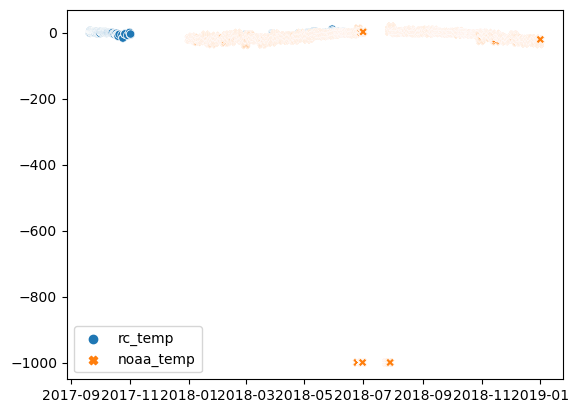

In [5]:
#plot both temperature datas at once.
series_rctemp = rdf_hourly_mean.temp2
series_rctemp.name = "rc_temp"
series_rctemp.replace(pd.NA, np.nan, inplace=True)

series_noaatemp = ndf.temp2meters
series_noaatemp.replace(pd.NA, np.nan, inplace=True)

series_noaatemp.name = "noaa_temp"
rndf_plot = pd.concat([series_rctemp,series_noaatemp],axis=1)
display(rndf_plot.iloc[4100:4110])
sb.scatterplot(rndf_plot)

<Axes: xlabel='rc_temp', ylabel='noaa_temp'>

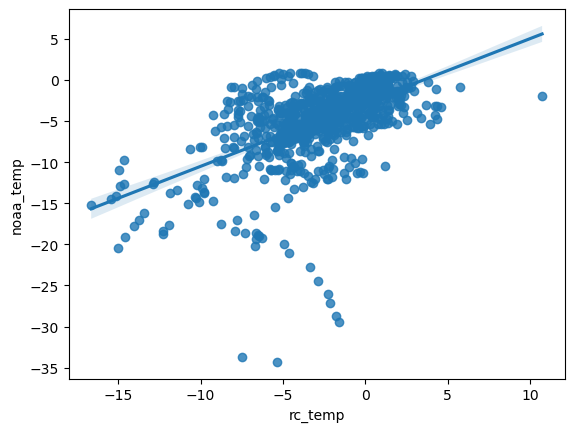

In [6]:
sb.regplot(data=rndf_plot, x="rc_temp",y="noaa_temp")

## Cross-Corellation to match dates

These were experiments I did to test if I can use cross-correlation.  In the end I concluded this was not the correct algorithm for this problem.  Instead, rmse proved more robust

In [33]:
import scipy as scp

needleLength = 7 # in days

#Testing with one week
# combdf = pd.concat([series_rctemp,series_noaatemp],axis=1)
#nooaMean = combdf.noaa_temp.mean()
combdf =  combdf
#sb.scatterplot(combdf)
start_date = combdf.index.min() 
end_date = combdf.index.max()
# current_date = start_date + pd.DateOffset(months=19, days=1)
current_date = pd.Timestamp("2018-05-20 17:00:00")
end_of_week = current_date + pd.DateOffset(days=needleLength)
weekly_data = combdf.loc[current_date:end_of_week]
#sb.scatterplot(weekly_data)

#needle = weekly_data.rc_temp.to_numpy()
needle = weekly_data.noaa_temp.to_numpy()
monthbefore = current_date - pd.DateOffset(months=1)
monthafter  = current_date + pd.DateOffset(months=1)

haystack = combdf.noaa_temp[monthbefore:monthafter].to_numpy()
haystackdf = combdf[monthbefore:monthafter]

plt.suptitle("NOAA data slice")
plt.ylabel('Temperature (C)')  

sb.scatterplot(needle)
plt.figure()
plt.suptitle("NOAA data slice overlayed on NOAA data")
plt.ylabel('Temperature (C)')  

sb.scatterplot(haystackdf.noaa_temp)
sb.scatterplot(weekly_data.noaa_temp)
plt.figure()

# conv = np.convolve(needle[::-1],haystack,mode='valid')
# conv = np.correlate(needle,haystack,mode='valid')
# conv = np.correlate(haystack,needle,mode="full")
conv = np.convolve(needle[::-1],haystack,mode='full')

plt.suptitle("Cross-Correlation")

sb.lineplot(conv)
convoffset = conv.argmax()
plt.axvline(x=convoffset, color='r', linestyle='--', label='Max correlation position')
plt.legend()
plt.show()
plt.figure()
display(needle.shape,haystack.shape,conv.shape)
haystackdf.index.get_loc(current_date)
display("Correct Date: ",current_date)
prediecteddate = monthbefore + pd.DateOffset(hours=int(convoffset))
prediecteddate += pd.DateOffset(hours=int(convoffset//2))
#pred_end_of_week  += pd.DateOffset(hours=int(convoffset//2))
display("Date Predicted",convoffset,haystackdf.iloc[convoffset],prediecteddate)
pred_end_of_week  = prediecteddate + pd.DateOffset(days=needleLength)
display("Difference in dates are",current_date-prediecteddate)

# sb.scatterplot(combdf[prediecteddate:pred_end_of_week].rc_temp.to_numpy())
sb.scatterplot(haystackdf[current_date:end_of_week].noaa_temp.to_numpy())
sb.scatterplot(haystackdf[prediecteddate:pred_end_of_week].noaa_temp.to_numpy())
plt.suptitle("NOAA data position at max index of convolution")
plt.ylabel('Temperature (C)')  




(169,)

(1465,)

(1633,)

'Correct Date: '

Timestamp('2018-05-20 17:00:00')

'Date Predicted'

168

noaa_temp    -10.6
pheno_temp     NaN
Name: 2018-04-27 17:00:00, dtype: float64

Timestamp('2018-05-01 05:00:00')

'Difference in dates are'

Timedelta('19 days 12:00:00')

Text(0, 0.5, 'Temperature (C)')

In [63]:
#Weekly data extraction
# Extract data one week at a time
combdf = rndf_plot.dropna()
start_date = combdf.index.min()
end_date = combdf.index.max()
current_date = start_date + pd.DateOffset(months=6)
while current_date <= end_date:
    end_of_week = current_date + pd.DateOffset(days=6)
    # Extract data for the current week
    weekly_data = combdf.loc[current_date:end_of_week]
    sb.scatterplot(weekly_data)
    current_date = end_of_week + pd.DateOffset(days=1)
    break

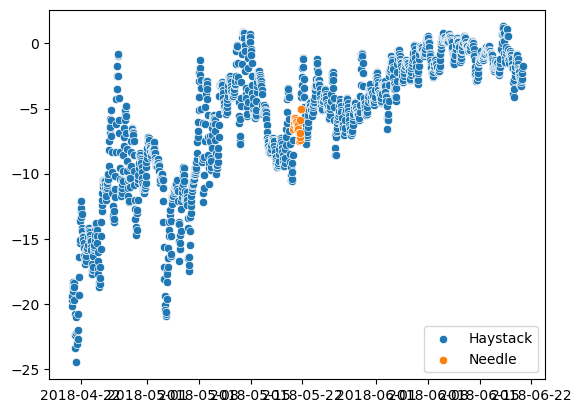

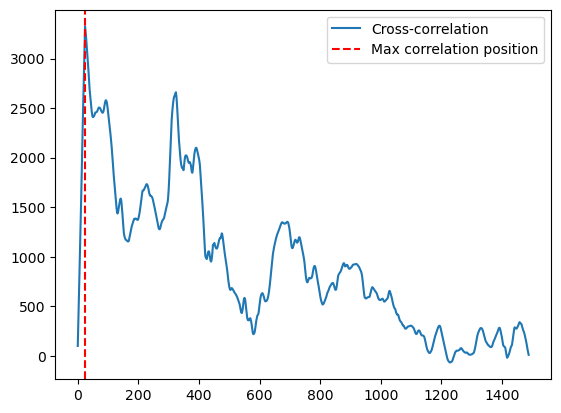

'Correct Date:'

Timestamp('2018-05-20 19:00:00')

'Predicted Date:'

Timestamp('2018-04-21 19:00:00')

In [73]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming you have imported necessary libraries and defined your dataframes and variables

needleLength = 12  # in days

# Extract the needle and haystack signals
needle = weekly_data.noaa_temp.to_numpy()
haystack = combdf.noaa_temp[monthbefore:monthafter].to_numpy()

# Compute cross-correlation
conv = np.correlate(haystack, needle, mode='full')

# Find the position of the maximum correlation
convoffset = np.argmax(conv)

# Determine the predicted date
predicted_date = haystackdf.index[0] + pd.DateOffset(hours=int(convoffset))

# Plotting the results
sb.scatterplot(x=haystackdf.index, y=haystack, label='Haystack')
sb.scatterplot(x=weekly_data.index, y=needle, label='Needle')
plt.legend()
plt.show()

# Plot the cross-correlation result
plt.figure()
sb.lineplot(x=np.arange(len(conv)), y=conv, label='Cross-correlation')
plt.axvline(x=convoffset, color='r', linestyle='--', label='Max correlation position')
plt.legend()
plt.show()

# Display the results
display("Correct Date:", current_date)
display("Predicted Date:", predicted_date)


###Cross-corellation using scipy

In [67]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

needleLength = 1 # in days

#Testing with one week
combdf = pd.concat([series_rctemp,series_noaatemp],axis=1)
#nooaMean = combdf.noaa_temp.mean()
combdf =  combdf
#sb.scatterplot(combdf)
start_date = combdf.index.min() 
end_date = combdf.index.max()
current_date = start_date + pd.DateOffset(months=8, days=1)
end_of_week = current_date + pd.DateOffset(days=needleLength)
weekly_data = combdf.loc[current_date:end_of_week]
# sb.scatterplot(weekly_data)



#needle = weekly_data.rc_temp.to_numpy()
needle = weekly_data.noaa_temp.to_numpy()
monthbefore = current_date - pd.DateOffset(months=1)
monthafter  = current_date + pd.DateOffset(months=1)

haystackdf = combdf[monthbefore:monthafter]
haystack = haystackdf.noaa_temp.to_numpy()

# Find the index value for the specified date
expected_index = haystackdf.index.get_loc(current_date)

sb.scatterplot(needle)
plt.figure()
sb.scatterplot(haystackdf.noaa_temp)
sb.scatterplot(weekly_data.noaa_temp)
plt.axvline(x=haystackdf.iloc[expected_index].name, color='g', linestyle='--', label='Max correlation position')
plt.figure()

correlation = signal.correlate(haystack, needle, mode="full",method="direct")
correlation /= np.max(correlation)
lags = signal.correlation_lags( haystack.size, needle.size, mode="full")
lag = lags[np.argmax(correlation)]
sb.lineplot(correlation)
plt.axvline(x=np.argmax(correlation), color='r', linestyle='--', label='Max correlation position')
plt.axvline(x=expected_index, color='g', linestyle='--', label='Correct position')
plt.legend()

plt.figure()
sb.lineplot(lags)
display("the lag is at index",lag)
display("the true index is at",expected_index)
# Determine the predicted date
# predicted_date = haystackdf.index[0] + pd.DateOffset(hours=int(convoffset))
# Determine the predicted date
predicted_date = haystackdf.iloc[lag]
display("predicted",predicted_date.name)
display("actual",current_date)

display("haystack size",haystack.size, "needle size",needle.size,)

'the lag is at index'

0

'the true index is at'

720

'predicted'

Timestamp('2018-04-20 19:00:00')

'actual'

Timestamp('2018-05-20 19:00:00')

'haystack size'

1465

'needle size'

25

In [128]:
correlation = signal.correlate(haystack[:needle.size], needle, mode="valid")
correlation


array([16800.59])

### A test of a cross-correlation lag graph from stackoverflow

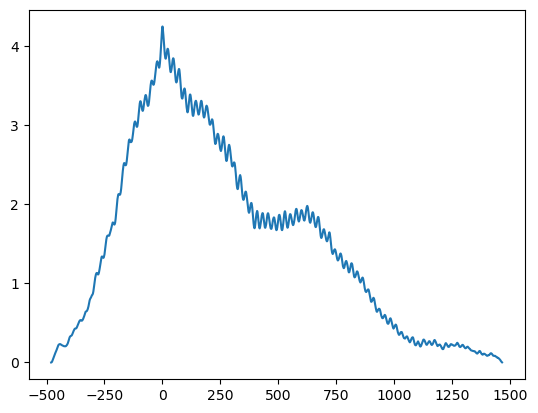

397

720

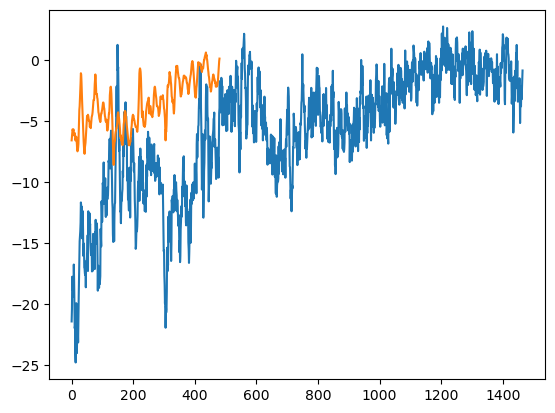

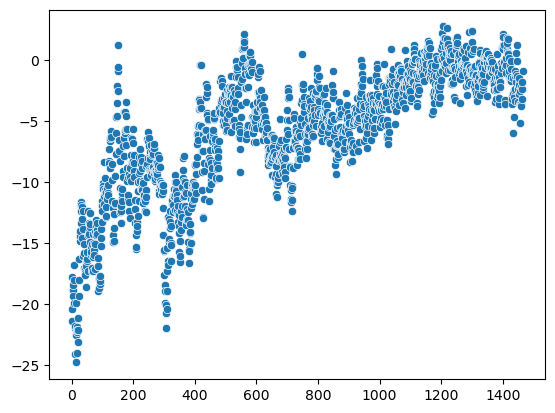

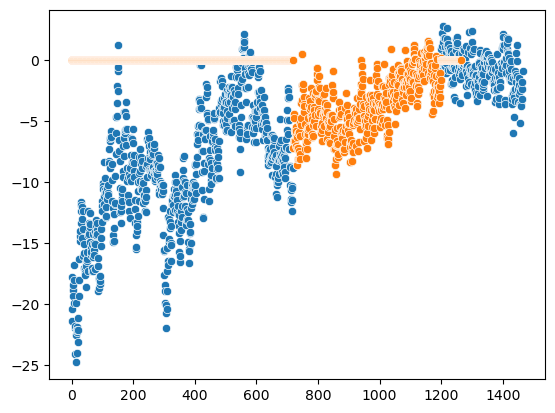

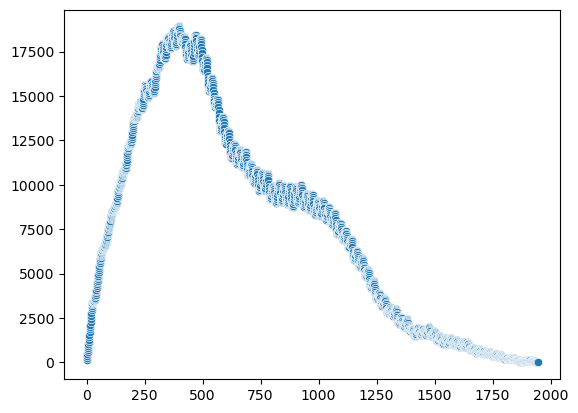

<Figure size 640x480 with 0 Axes>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, convolve

#plt.clear("all")

rng = np.random.default_rng()
haystacknoise = haystack + rng.standard_normal(len(haystack)) 

def plot_xcorr(x, y): 
    "Plot cross-correlation (full) between two signals."
    N = max(len(x), len(y)) 
    n = min(len(x), len(y)) 

    if N == len(y): 
        lags = np.arange(-N + 1, n) 
    else: 
        lags = np.arange(-n + 1, N) 
    c = correlate(x / np.std(x), y / np.std(y), 'full') 

    plt.plot(lags, c / n) 
    plt.show() 
    
plot_xcorr(haystacknoise,needle)
plt.figure()
sb.lineplot(haystacknoise)
sb.lineplot(needle)
displaced_needle = np.copy(haystacknoise)
displaced_needle[:expected_index] = 0
displaced_needle[expected_index+needleLength*24:] = 0
# displaced_needle = displaced_needle[200:]
displaced_needle = displaced_needle[:-200]

plt.figure()
sb.scatterplot(haystacknoise)
plt.figure()
sb.scatterplot(haystacknoise)
sb.scatterplot(displaced_needle)
plt.figure()
#displacedCorr = convolve(haystacknoise,displaced_needle,mode="full")
displacedCorr = convolve(haystacknoise,needle,mode="full")

sb.scatterplot(displacedCorr)
plt.figure()

#plot_xcorr(haystacknoise,displaced_needle)
display(displacedCorr.argmax(),expected_index)

### attempt number 2 with data exporation

481

1465

'sizes for haystack and needle'

1465

481

'minimum for rmse'

720

0.5310098235140596

984

<Axes: >

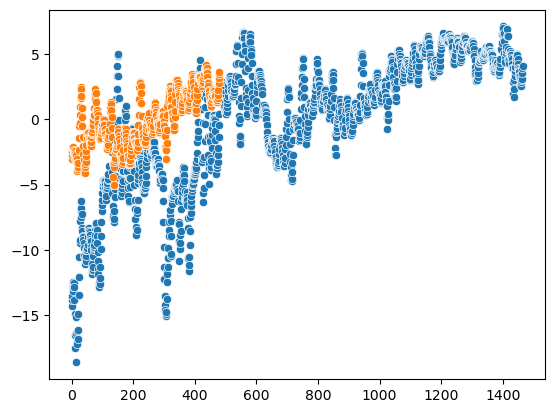

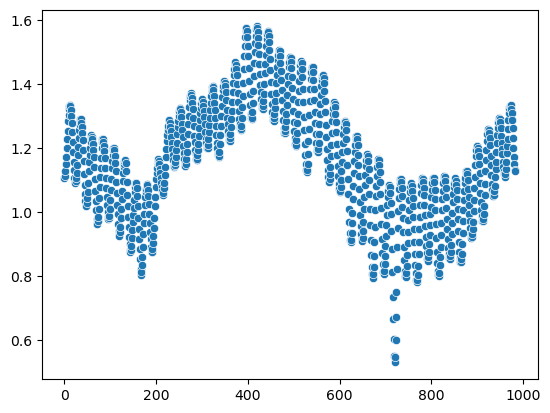

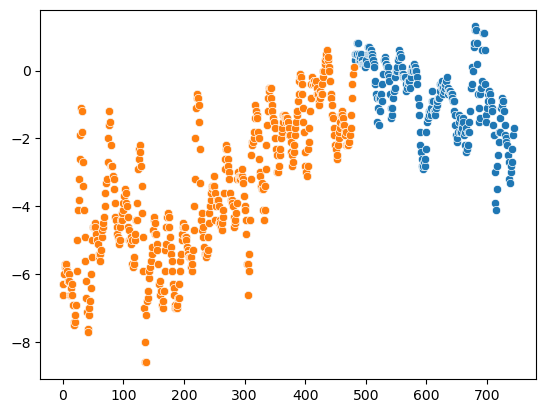

In [140]:
import scipy
meanhaystack = haystack - haystack.mean()
meanneedle = needle - needle.mean()

needlegrad = np.gradient(needle)
haystackgrad = np.gradient(haystack)

display(needle.size,haystack.size)

sb.scatterplot(meanhaystack)
sb.scatterplot(meanneedle)
corr = correlate(haystackgrad,needlegrad,mode="valid")

%matplotlib inline

def myRunningCorrelate(sig1,sig2):
    bigsig = sig2
    smallsig = sig1
    #reverse if above assumption is not true
    if sig1.size > sig2.size:
        bigsig = sig1
        smallsig = sig2
    corval = []
    for i in range(0,bigsig.size - smallsig.size):
        bigwindow = bigsig[i:smallsig.size+i]
        product = smallsig * bigwindow
        summation = product.sum()
        corval.append(summation)
    return np.array(corval)

def myRunningDifference(sig1,sig2):
    bigsig = sig2
    smallsig = sig1
    #reverse if above assumption is not true
    if sig1.size > sig2.size:
        bigsig = sig1
        smallsig = sig2
    corval = []
    smallsig = scipy.stats.zscore(smallsig)
    for i in range(0,bigsig.size - smallsig.size):
        bigwindow = bigsig[i:smallsig.size+i]
        bigwindow = scipy.stats.zscore(bigwindow)
        
        
        diff = smallsig - bigwindow
        diff *= diff
        summation = diff.mean()
        summation = np.sqrt(summation)
        corval.append(summation)
    return np.array(corval)

def getzero(sig):
    abssig = abs(sig)
    return abssig.argmin()

rng = np.random.default_rng()


dcneedle = needle + rng.standard_normal(len(needle))*1.2
mycor = myRunningDifference(dcneedle,haystack)
plt.figure()
sb.scatterplot(mycor)
#find closest to zero
display("sizes for haystack and needle",haystack.size,needle.size)


display("minimum for rmse",mycor.argmin(),mycor.min(),mycor.size)
minval = mycor.argmin()
        
plt.figure()
sb.scatterplot(haystack[minval:]) 
sb.scatterplot(needle)      

In [133]:
#visualize
%matplotlib tk

def myRunningDifference(sig1,sig2):
    bigsig = sig2
    smallsig = sig1
    #reverse if above assumption is not true
    if sig1.size > sig2.size:
        bigsig = sig1
        smallsig = sig2
    corval = []
    for i in range(0,bigsig.size-smallsig.size):
        bigwindow = bigsig[i:smallsig.size+i]
        diff = smallsig - bigwindow
        diff *= diff
        summation = diff.mean()
        summation = np.sqrt(summation)
        corval.append(summation)
        if abs(i-720) < 5:
            sb.scatterplot(bigwindow)
            ax = sb.scatterplot(smallsig)
            ax.set(title = "rmse is " + str(summation) + " index is at "+str(i))
t
        
    return np.array(corval)


# mycor = myRunningDifference(needle,haystack)
dcneedle = needle - 3
mycor = myRunningDifference(dcneedle,haystack)


#canvas = np.zeros_like(haystack)
#canvas[720:720+needle.size] = needle
#sb.scatterplot(haystack)

#sb.scatterplot(canvas)



# Using Rolling RMSE to match dates

In [30]:
#Define Rolling RMSE function
import scipy as scp
# mini = np.inf

def myRunningDifference(sig1,sig2):
    global mini
    bigsig = sig2
    smallsig = sig1
    #reverse if above assumption is not true
    if sig1.size > sig2.size:
        bigsig = sig1
        smallsig = sig2
    corval = []
    smallnanmask = np.isnan(smallsig)
    for i in range(0,bigsig.size - smallsig.size):
        bigwindow = bigsig[i:smallsig.size+i]
        bigwindownanmask = np.isnan(bigwindow)
        nanmask = bigwindownanmask + smallnanmask
        
        smallnonan = smallsig.copy()
        smallnonan[smallnanmask] = 0
        zsmall = scipy.stats.zscore(smallnonan)
        
        bigwindownonan = bigwindow.copy()
        bigwindownonan[smallnanmask] = 0
        bigwindownonan[bigwindownanmask] = 0
        zbig = scipy.stats.zscore(bigwindownonan)
        zbig[np.isnan(zbig)] = 0
        
        if(np.isnan(zsmall).sum() > 0):
            raise Exception

        
        diff = zsmall - zbig
        diff *= diff
        summation = diff.mean()
        summation = np.sqrt(summation)
        corval.append(summation)
#         if summation < mini:
#             mini = summation
#             plt.figure()
#             sb.scatterplot(zbig)
#             sb.scatterplot(zsmall)
#             plt.ylabel('Z-Score')  
#             plt.xlabel('Index')  
#             plt.title('Normalized Temperature Segments')  
            

#             plt.legend(labels=["NOAA_temp","Pheno_temp"])

            
    return np.array(corval)
print("loaded")
#myRunningDifference(needle,haystack)

loaded


In [53]:
#Convert into a function
def searchDate(df,startDate,dateLength):
    monthbefore = startDate - pd.DateOffset(months=1)
    monthafter  = startDate + pd.DateOffset(months=1,days=dateLength)
    end_of_window = startDate + pd.DateOffset(days=dateLength)
    window_data = df.loc[startDate:end_of_window]
    needle = window_data.pheno_temp.to_numpy()
    haystack = df.noaa_temp[monthbefore:monthafter].to_numpy()
    
    rollrmse = myRunningDifference(needle,haystack)
    rmsemin = rollrmse.min()
    predindex = rollrmse.argmin()
    predDate = monthbefore + pd.DateOffset(hours=int(predindex))
    return predDate,rmsemin
# current_date = start_date + pd.DateOffset(months=1, days=0)
current_date = pd.Timestamp("2019-07-05 17:00:00")
print(current_date)
searchDate(combdf,current_date,7)

2019-07-05 17:00:00


AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'

## Window Data Extraction

In [12]:
#Weekly data extraction
# Extract data one week at a time
start_date = combdf.pheno_temp.first_valid_index()
end_date = combdf.index.max()
current_date = start_date
# current_date = pd.Timestamp("1/16/2019  8:00:00 PM")
windowSize = 21
combdf.replace(-999.9, np.nan, inplace=True)
timedates = []
predictedDates = []
timedelts = []
datapoints = []
rmses = []
while current_date <= end_date:
    timedates.append(current_date)
    end_of_window = current_date + pd.DateOffset(days=windowSize)
    # Extract data for the current week
    weekly_data = combdf.loc[current_date:end_of_window]
    pheno_data = weekly_data.pheno_temp
    #plt.plot(weekly_data)
    #plt.legend(labels=weekly_data.columns)
    data_points = pheno_data.count()
    datapoints.append(data_points)
    # print("data points in window",data_points)
    # print("current date, ",current_date)

    if data_points > 4:
        predDate,rmse = searchDate(combdf,current_date,windowSize)
        # print("predicted date", predDate)
        # print("date difference",(current_date-predDate))
        # print("rmse is",rmse)
        timedelts.append(current_date-predDate)
        predictedDates.append(predDate)
        rmses.append(rmse)
    else:
        timedelts.append(np.nan)
        predictedDates.append(np.nan)
    # print()
    # current_date = end_of_window -  pd.DateOffset(days=1)#pd.DateOffset(days=windowSize//2)
    current_date = current_date +  pd.DateOffset(days=1)#pd.DateOffset(days=windowSize//2)
    

    #plt.pause(1)
    #plt.clf()



In [13]:
td = pd.DataFrame(list(zip(timedates,timedelts,predictedDates,datapoints)), columns = ["datetime","timeoffset","predictedDates","datapoints"])
# td.to_csv("time_dets_2019_RC0001_daystep_"+str(windowSize)+"day.csv")
td
# td = [pd.to_timedelta(x).astype('timedelta64[s]') for x in timedelts]
# td = td.astype('timedelta64[ns]')
# td = td.fillna(np.nan)
# td = td.to_numpy().astype(float)/ 3.6e12
# plt.plot(td)


,datetime,timeoffset,predictedDates,datapoints
0,2018-07-17 17:00:00,-7 days +13:00:00,2018-07-24 04:00:00,392
1,2018-07-18 17:00:00,-7 days +14:00:00,2018-07-25 03:00:00,392
2,2018-07-19 17:00:00,13 days 17:00:00,2018-07-06 00:00:00,393
3,2018-07-20 17:00:00,13 days 17:00:00,2018-07-07 00:00:00,393
4,2018-07-21 17:00:00,13 days 17:00:00,2018-07-08 00:00:00,392
...,...,...,...,...
421,2019-09-11 17:00:00,NaT,NaT,0
422,2019-09-12 17:00:00,NaT,NaT,0
423,2019-09-13 17:00:00,NaT,NaT,0
424,2019-09-14 17:00:00,NaT,NaT,0


# Testing and exploring
Try using the 'interactive' cell.

In [31]:
#exploration and testing
%matplotlib tk
plt.close("all")

needleLength = 5 # in days


#nooaMean = combdf.noaa_temp.mean()
combdf.replace(-999.9, np.nan, inplace=True)


# plt.plot(combdf)
# plt.figure()

start_date = combdf.index.min() 
end_date = combdf.index.max()

current_date = pd.Timestamp("6/20/2018  3:00:00 AM") #Good date for visuals
# current_date = pd.Timestamp("2019-02-18 17:00:00")

#set offset or set to None to let program figure it out
predDate = None
# predDate = current_date - pd.DateOffset(days=-94,hours=16)



end_of_week = current_date + pd.DateOffset(days=needleLength)
weekly_data = combdf.loc[current_date:end_of_week]
#sb.scatterplot(weekly_data)

needle = weekly_data.pheno_temp.to_numpy()
# needle = weekly_data.noaa_temp.to_numpy()
monthbefore = current_date - pd.DateOffset(months=0)
monthafter  = current_date + pd.DateOffset(months=0,days=needleLength+10)

haystack = combdf.noaa_temp[monthbefore:monthafter].to_numpy()
haystackdf = combdf[monthbefore:monthafter]

# sb.scatterplot(needle).set_title("camera temperature")
# plt.figure()
sb.scatterplot(haystackdf.noaa_temp).set_title("noaa temperature with camera temperature stacked on")
sb.scatterplot(weekly_data.pheno_temp)
plt.ylabel('Temperature (C)')  
plt.xlabel('Date')  

plt.legend(labels=haystackdf.columns)
plt.figure()

rollrmse = myRunningDifference(needle,haystack)
rmsemin = rollrmse.min()
predindex = rollrmse.argmin()

sb.lineplot(rollrmse).set_title("rolling rmse, minimum value is " + str(rmsemin) + " at index " + str(predindex))
plt.ylabel('RMSE')  
plt.xlabel('Index') 

if predDate is None:
    predDate = monthbefore + pd.DateOffset(hours=int(predindex))
pred_end_of_week = predDate +  pd.DateOffset(days=needleLength)

print("actual date",current_date,"\nPredicted Date",predDate)
plt.figure()
predDateRange = haystackdf[predDate:pred_end_of_week].index
sb.scatterplot(y=haystackdf[predDate:pred_end_of_week].noaa_temp.to_numpy(), x=predDateRange)
#sb.scatterplot(haystackdf[predDate:pred_end_of_week].pheno_temp.to_numpy()).set_title("camera corrected date temperature")
sb.scatterplot(y=haystackdf[current_date:end_of_week].pheno_temp.to_numpy(), x=predDateRange).set_title("camera corrected date temperature at date: "+str(predDate))
plt.legend(labels=haystackdf.columns)


print(current_date-predDate)

# sb.lineplot(conv)
# convoffset = conv.argmax()
# plt.axvline(x=convoffset, color='r', linestyle='--', label='Max correlation position')
# plt.legend()
# plt.show()
# plt.figure()
# display(needle.shape,haystack.shape,conv.shape)
# haystackdf.index.get_loc(current_date)
# display("Correct Date: ",current_date)
# prediecteddate = monthbefore + pd.DateOffset(hours=int(convoffset))
# prediecteddate += pd.DateOffset(hours=int(convoffset//2))
# #pred_end_of_week  += pd.DateOffset(hours=int(convoffset//2))
# display("Date Predicted",convoffset,haystackdf.iloc[convoffset],prediecteddate)
# pred_end_of_week  = prediecteddate + pd.DateOffset(days=needleLength)
# display("Difference in dates are",current_date-prediecteddate)

# # sb.scatterplot(combdf[prediecteddate:pred_end_of_week].rc_temp.to_numpy())

# sb.scatterplot(haystackdf[current_date:end_of_week].noaa_temp.to_numpy())
# sb.scatterplot(haystackdf[prediecteddate:pred_end_of_week].noaa_temp.to_numpy())


actual date 2018-06-20 03:00:00 
Predicted Date 2018-06-23 04:00:00
-4 days +23:00:00


In [73]:
#exploration and testing interactive plotting
%matplotlib tk
plt.close("all")

needleLength = 30 # in days


#nooaMean = combdf.noaa_temp.mean()
combdf.replace(-999.9, np.nan, inplace=True)


# plt.plot(combdf)
# plt.figure()

start_date = combdf.index.min() 
end_date = combdf.index.max()

# current_date = pd.Timestamp("6/20/2018  3:00:00 AM") #Good date for visuals
current_date = pd.Timestamp("2019-01-01 17:00:00")

#set offset or set to None to let program figure it out
predDate = None
# predDate = current_date - pd.DateOffset(days=-94,hours=16)



end_of_week = current_date + pd.DateOffset(days=needleLength)
weekly_data = combdf.loc[current_date:end_of_week]
#sb.scatterplot(weekly_data)

needle = weekly_data.pheno_temp.to_numpy()
# needle = weekly_data.noaa_temp.to_numpy()
monthbefore = current_date - pd.DateOffset(months=0)
monthafter  = current_date + pd.DateOffset(months=3,days=needleLength)

haystack = combdf.noaa_temp[monthbefore:monthafter].to_numpy()
haystackdf = combdf[monthbefore:monthafter]

# sb.scatterplot(needle).set_title("camera temperature")
# plt.figure()
sb.scatterplot(haystackdf.noaa_temp).set_title("noaa temperature with camera temperature stacked on")
sb.scatterplot(weekly_data.pheno_temp)
plt.legend(labels=haystackdf.columns)
plt.figure()

rollrmse = myRunningDifference(needle,haystack)
predindex = rollrmse.argmin()

def plot_graph(rmse):
    rmsemin = rollrmse.min()
    predindex = rollrmse.argmin()
    sb.lineplot(rollrmse).set_title("rolling rmse, minimum value is " + str(rmsemin) + " at index " + str(predindex))

def pick_peak_valley(rmse):
    import matplotlib.pyplot as plt
    
    plot_graph(rmse)

    picked_points = {'peaks': [], 'valleys': []}
    y_values = np.arange(len(rmse))

    def onclick(event):
        x_index = int(event.xdata)
        y_value = y_values[x_index]
        predindex = x_index

        if len(picked_points['peaks']) > len(picked_points['valleys']):
            picked_points['valleys'].append((rmse, y_value))
            print(f'Valley picked at index {rmse}')
        else:
            picked_points['peaks'].append((rmse, y_value))
            print(f'Peak picked at index {rmse}')
            
        predDate = monthbefore + pd.DateOffset(hours=int(predindex))
        pred_end_of_week = predDate +  pd.DateOffset(days=needleLength)

        print("actual date",current_date,"\nPredicted Date",predDate)
        plt.figure()
        predDateRange = haystackdf[predDate:pred_end_of_week].index
        sb.scatterplot(y=haystackdf[predDate:pred_end_of_week].noaa_temp.to_numpy(), x=predDateRange)
        #sb.scatterplot(haystackdf[predDate:pred_end_of_week].pheno_temp.to_numpy()).set_title("camera corrected date temperature")
        sb.scatterplot(y=haystackdf[current_date:end_of_week].pheno_temp.to_numpy(), x=predDateRange).set_title("camera corrected date temperature at date: "+str(predDate))
        plt.legend(labels=haystackdf.columns)

        print(current_date-predDate)

    fig, ax = plt.subplots()
    sb.lineplot(rollrmse).set_title("rolling rmse, minimum value is " + str(rmsemin) + " at index " + str(predindex))
    fig.canvas.mpl_connect('button_press_event', onclick)
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('Interactive Peak/Valley Selection')
    plt.show()

    return picked_points

picked_points = pick_peak_valley(rollrmse)

if predDate is None:
    predDate = monthbefore + pd.DateOffset(hours=int(predindex))
pred_end_of_week = predDate +  pd.DateOffset(days=needleLength)

print("actual date",current_date,"\nPredicted Date",predDate)
plt.figure()
predDateRange = haystackdf[predDate:pred_end_of_week].index
sb.scatterplot(y=haystackdf[predDate:pred_end_of_week].noaa_temp.to_numpy(), x=predDateRange)
#sb.scatterplot(haystackdf[predDate:pred_end_of_week].pheno_temp.to_numpy()).set_title("camera corrected date temperature")
sb.scatterplot(y=haystackdf[current_date:end_of_week].pheno_temp.to_numpy(), x=predDateRange).set_title("camera corrected date temperature at date: "+str(predDate))
plt.legend(labels=haystackdf.columns)




print(current_date-predDate)
# sb.lineplot(conv)
# convoffset = conv.argmax()
# plt.axvline(x=convoffset, color='r', linestyle='--', label='Max correlation position')
# plt.legend()
# plt.show()
# plt.figure()
# display(needle.shape,haystack.shape,conv.shape)
# haystackdf.index.get_loc(current_date)
# display("Correct Date: ",current_date)
# prediecteddate = monthbefore + pd.DateOffset(hours=int(convoffset))
# prediecteddate += pd.DateOffset(hours=int(convoffset//2))
# #pred_end_of_week  += pd.DateOffset(hours=int(convoffset//2))
# display("Date Predicted",convoffset,haystackdf.iloc[convoffset],prediecteddate)
# pred_end_of_week  = prediecteddate + pd.DateOffset(days=needleLength)
# display("Difference in dates are",current_date-prediecteddate)

# # sb.scatterplot(combdf[prediecteddate:pred_end_of_week].rc_temp.to_numpy())

# sb.scatterplot(haystackdf[current_date:end_of_week].noaa_temp.to_numpy())
# sb.scatterplot(haystackdf[prediecteddate:pred_end_of_week].noaa_temp.to_numpy())


actual date 2019-01-01 17:00:00 
Predicted Date 2019-03-09 09:00:00
-67 days +08:00:00
Peak picked at index [0.76452549 0.76530813 0.76454335 ... 0.78330274 0.78082885 0.77889866]
actual date 2019-01-01 17:00:00 
Predicted Date 2019-01-07 22:00:00
-7 days +19:00:00
Valley picked at index [0.76452549 0.76530813 0.76454335 ... 0.78330274 0.78082885 0.77889866]
actual date 2019-01-01 17:00:00 
Predicted Date 2019-01-20 06:00:00
-19 days +11:00:00
Peak picked at index [0.76452549 0.76530813 0.76454335 ... 0.78330274 0.78082885 0.77889866]
actual date 2019-01-01 17:00:00 
Predicted Date 2019-01-28 12:00:00
-27 days +05:00:00
Valley picked at index [0.76452549 0.76530813 0.76454335 ... 0.78330274 0.78082885 0.77889866]
actual date 2019-01-01 17:00:00 
Predicted Date 2019-02-24 19:00:00
-55 days +22:00:00
Peak picked at index [0.76452549 0.76530813 0.76454335 ... 0.78330274 0.78082885 0.77889866]
actual date 2019-01-01 17:00:00 
Predicted Date 2019-01-07 22:00:00
-7 days +19:00:00


In [53]:
predindex

1674

In [2]:
plt.plot(combdf)datapoints

NameError: name 'plt' is not defined

In [ ]:
start_date = combdf.pheno_temp.first_valid_index()
end_date = combdf.index.max()
print(end_date ,start_date)
print(end_date - start_date)